In [21]:
# tryng my own model with numpy 
# might try keras later
import numpy as np
import pandas as pd
from math import e, inf, sqrt
import random
from PIL import Image
import matplotlib.pyplot as plt

# activation 
def sig(x):
    y = 1/(1 + np.exp(-x))
    return y

# activation gradient
def sigDeriv(x):
    y = sig(x)*(1-sig(x))
    return y
x = np.array([1,2,3])
sigDeriv(x)



array([0.19661193, 0.10499359, 0.04517666])

In [22]:
dat = pd.read_csv("handwritten digits (images).csv",dtype=int)
numOfDatasets = len(dat)
dat

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
TrainingData = pd.DataFrame(dat.iloc[:, 1:]).to_numpy(copy=True, dtype=np.int32)

# normalise data (make mean 0 and std 1)
mean = np.mean(TrainingData)
std = np.std(TrainingData)
TrainingData = (TrainingData - mean)/std
sum(TrainingData[0,:])

-121.28699186719702

correct ans: 1


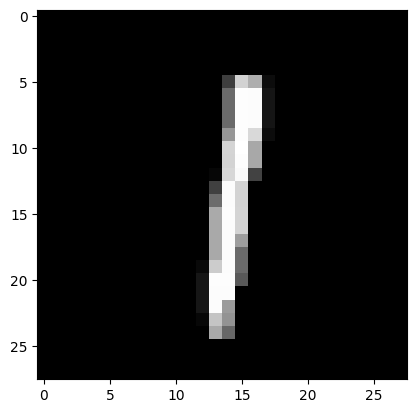

In [24]:
# used to test later 
def DataColToImage(x):
    image = Image.fromarray(TrainingData[x, :].reshape(28,28) * std + mean)
    plt.imshow(image)
    print("correct ans:", dat.iloc[x, 0])
DataColToImage(random.randint(0,42000))

In [25]:
TrainingData[1, :].shape

(784,)

In [26]:
# separate training and test data by indexes 
testNum = 6000
allIndex = list(range(0,42000))
trainIndex = []
for i in range(0, 42000 - testNum):
    x = random.randint(0, len(allIndex) - 1)
    trainIndex.append(allIndex[x])
    allIndex.pop(x)
testIndex = allIndex
print(len(testIndex))

6000


In [27]:
x = np.array([[1,2,3],
              [1,2,3]])

y = np.array([[1,2,3]])

y.shape

(1, 3)

In [28]:
inputNumber = 784
Hidden1NeuronCount = 70
Hidden2NeuronCount = 90 
outputCount = 10
learningRate = 0.1

# all weights from each row will lead to same neuron of the next layer 
# all weights from same column will act on same neuron of current layer
# first row weights are all weights that lead to first neuron in the next layer, etc
# first column weights are all weights that act on first neuron of current layer 
# weight.T = [all weights that act on first neuron of current layer]
#          [all weights that act on second neuron of current layer], etc...
# weight = [all weights that lead to first neuron of next layer]
#            [all weights that lead to second neuron of next layer], etc... 
# data will be a single column
# next layer calculated will be single column with all neurons (good)
# h,g,f,H,G,F == inactivated and activated hidden layers and final layers respectively

weights1 = np.random.uniform(-0.5,0.5,(Hidden1NeuronCount, inputNumber))
weights2 = np.random.uniform(-0.5,0.5,(Hidden2NeuronCount, Hidden1NeuronCount))
weights3 = np.random.uniform(-0.5,0.5,(outputCount, Hidden2NeuronCount))

biases1 = np.random.uniform(-0.1,0.1,(Hidden1NeuronCount, 1))
biases2 = np.random.uniform(-0.2,0.2,(Hidden2NeuronCount, 1))
biases3 = np.random.uniform(-0.3,0.3,(outputCount,1))

print(weights1.shape, weights2.shape, weights3.shape)
sig(weights1)

(70, 784) (90, 70) (10, 90)


array([[0.47893745, 0.39252905, 0.54990216, ..., 0.451808  , 0.6147732 ,
        0.59868301],
       [0.42590238, 0.60514057, 0.51553452, ..., 0.47548393, 0.47271572,
        0.42244137],
       [0.46237309, 0.44640199, 0.43430197, ..., 0.45391562, 0.58919387,
        0.43472783],
       ...,
       [0.40494952, 0.61179244, 0.55759505, ..., 0.56561823, 0.61880531,
        0.61563317],
       [0.42386977, 0.53623979, 0.48580951, ..., 0.61560063, 0.54139931,
        0.55411422],
       [0.40689139, 0.40241076, 0.39902126, ..., 0.51249937, 0.47279367,
        0.60882924]])

In [29]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

def test():
    # single test
    randomTest = testIndex[random.randint(0, testNum-1)] # only uses testdata for testing dont use data that will be iused in raining 
    prams = forwardProp(randomTest, weights1, weights2, weights3, biases1, biases2, biases3)
    modelAns, hidden1, hidden2, finallayer, UnactivatedHidden1, UnativatedHidden2, UnactivatedFinalLayer, data = prams
    ans = finallayer
    cost = np.sum((modelAns - finallayer)**2)
    DataColToImage(randomTest)
    print("predicted:", ans.argmax())
    return ans

def testMany():
    # test a bunch for accuracy calculations 
    correct = 0
    wrong = 0
    for i in range(0, testNum):
        singleTest = testIndex[i] # only uses testdata for testing dont use data that will be iused in raining
        finallayer = forwardProp(singleTest, weights1, weights2, weights3, biases1, biases2, biases3)[3]
        ans = softmax(finallayer)
        pred = ans.argmax()
        corr = int(dat.iloc[singleTest, 0])
        if pred == corr:
            correct += 1
        else:
            wrong += 1
    print("accuracy:", str((correct/(correct + wrong))*100) + "%" , flush=False)



In [30]:
def forwardProp(x, weight1, weight2, weight3, bias1, bias2, bias3):
    # forward propagation 
    data = TrainingData[x,:].reshape(inputNumber,1)
    
    UnactivatedHidden1 = np.dot(weight1, data)
    hidden1 = sig(UnactivatedHidden1) + bias1

    UnativatedHidden2 = np.dot(weight2, hidden1)
    hidden2 = sig(UnativatedHidden2) + bias2

    UnactivatedFinalLayer = np.dot(weight3, hidden2)
    finalLayer = sig(UnactivatedFinalLayer) + bias3

    correctAns = dat.iloc[x,0]
    modelAns = np.zeros((1,outputCount)) # create empty array
    modelAns[0,correctAns] = 1 # make the correct index become 1 rest remain 0
    return [modelAns, hidden1, hidden2, finalLayer, UnactivatedHidden1, UnativatedHidden2, UnactivatedFinalLayer, data]

forwardProp(41999, weights1, weights2, weights3, biases1, biases2, biases3)[3].shape

(10, 1)

In [31]:
biases3



array([[ 0.17592565],
       [ 0.07720206],
       [ 0.05654764],
       [-0.12135206],
       [ 0.22122827],
       [-0.22855987],
       [-0.11214764],
       [ 0.17882296],
       [ 0.18140139],
       [ 0.14497557]])

In [32]:
x = np.array(([1,2,3],
             [1,2,3]))
np.sum(x, 0)

array([2, 4, 6])

In [33]:
# optimise weights 
def backProp(params):
# h,g,f,H,G,F == inactivated and activated hidden layers and final layers respectively
    global weights1, weights2, weights3, biases1, biases2, biases3
    modelAns, H, G, F, h, g, f, data = params
    modelAns = modelAns.reshape(outputCount,1)
    cost = np.mean((modelAns - F)**2)
    
    
    dCdF = -2*(modelAns - F)
    dCdf = dCdF * sigDeriv(f)

    dCdG = np.sum(dCdf * weights3, 0).reshape(Hidden2NeuronCount,1)

    dCostdWeights3 = np.ones_like(weights3) * G.reshape(1, Hidden2NeuronCount) * dCdf
    
    dGdg = sigDeriv(g)

    dCdH = np.sum((dGdg * dCdG) * weights2, 0).reshape(Hidden1NeuronCount,1)

    dCostdWeights2 = np.ones_like(weights2) * H.reshape(1, Hidden1NeuronCount) * dCdG * dGdg

    dHdh = sigDeriv(h)

    dCostdWeights1 = np.ones_like(weights1) * data.reshape(1, inputNumber) * dCdH * dHdh

    dCostdBiases3 = dCdF 
    dCostdBiases2 = dCdG 
    dCostdBiases1 = dCdH
    weights3 -= dCostdWeights3 * learningRate
    weights2 -= dCostdWeights2 * learningRate
    weights1 -= dCostdWeights1 * learningRate
    biases3 -= dCostdBiases3 * learningRate
    biases2 -= dCostdBiases2 * learningRate
    biases1 -= dCostdBiases1 * learningRate
    return cost

backProp(forwardProp(3, weights1, weights2, weights3, biases1, biases2, biases3))

0.3224303941006375

In [38]:
# train of some data 
for i in range(42000 - testNum):
    x = trainIndex[i] # dont train on testdata
    cost = backProp(forwardProp(i, weights1, weights2, weights3, biases1, biases2, biases3))
    if i%1000 ==0: # every 1000 iteration print cost 
        print(f"{i}. cost = ", cost)


0. cost =  0.001714821880893386
1000. cost =  0.000379189184408444
2000. cost =  0.03716385047610894
3000. cost =  0.0004643026259820125
4000. cost =  0.00323683692284218
5000. cost =  0.08362380189776973
6000. cost =  0.0010223075498311082
7000. cost =  0.11960048723175457
8000. cost =  0.0027504368903187204
9000. cost =  0.00036207205205334906
10000. cost =  0.0014825205757569718
11000. cost =  0.0009107274699400641
12000. cost =  0.0015265451936112623
13000. cost =  0.13059505700555674
14000. cost =  0.001558417222468824
15000. cost =  4.027888233084223e-05
16000. cost =  8.114329534584928e-05
17000. cost =  0.00022579598393503465
18000. cost =  0.0024196710616807816
19000. cost =  0.0002157254050423829
20000. cost =  0.000859152286918606
21000. cost =  0.04446035356657875
22000. cost =  0.00041231471180697783
23000. cost =  0.002977841667504053
24000. cost =  6.299000436005728e-05
25000. cost =  0.003953225063111447
26000. cost =  0.0011620994991443877
27000. cost =  0.000825457973

correct ans: 6
predicted: 6


array([[-1.58472413e-02],
       [ 5.90237149e-04],
       [ 8.62595657e-02],
       [-1.07245400e-02],
       [ 2.47667017e-03],
       [-5.57276636e-03],
       [ 1.01882861e+00],
       [-9.94745411e-04],
       [-1.65612207e-03],
       [-2.03781691e-02]])

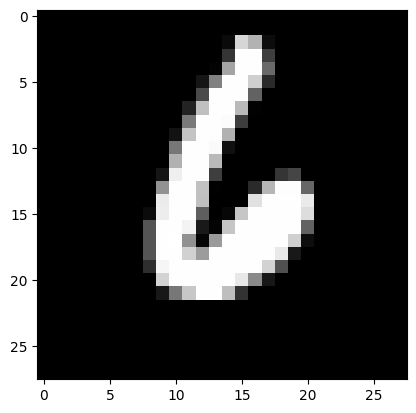

In [39]:
test() # do one to visualise 


In [40]:
testMany() # do many for accuracy calculation 

accuracy: 94.38333333333333%
